# Analyzing Taxi Companies

Zuber is a new ride-sharing company that launched in Chicago. Here we will look for patterns in the available information. We want to understand passenger preferences and the impact of external factors on travel.
The stages are that we will study the database first, what kind of data content is provided, what type of data it is, the number of rows and the number of columns, check whether there are empty values and display general information. Then we will analyze the data provided by looking for the 10 taxi companies that have the highest number of trips and the 10 taxi drop off areas with the highest average number of trips. We will create a bar chart to visualize the data. Then for the hypothesis testing stage, we will filter the data first to get data that is free from outliers. After obtaining clean data, we check with visualization whether the data provided has a normal distribution or not, after that we carry out a hypothesis test. We determine Ho and Ha. From the results of the hypothesis test, we will draw conclusions regarding the influence of weather on travel frequency.

Table of Contents:
1. General Info
2. Preparing Data
3. Data Analysis
4. Hypothesis Testing
5. Conclusion

## General Info

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import shapiro, mannwhitneyu
import warnings
warnings.filterwarnings('ignore')

In [101]:
df_1 = pd.read_csv('/datasets/project_sql_result_01.csv')
df_2 = pd.read_csv('/datasets/project_sql_result_04.csv')

In [102]:
df_1.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [103]:
df_1.shape

(64, 2)

In [104]:
df_1.isnull().sum()

company_name    0
trips_amount    0
dtype: int64

In [105]:
df_1.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [106]:
df_2.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [107]:
df_2.shape

(94, 2)

In [108]:
df_2.isnull().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

In [109]:
df_2.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


Conclusion: From the general information above it can be concluded that there are no missing values ​​and the data type is appropriate.

## Preparing Data

We will take the 10 taxi companies with the highest number of trips and the 10 regions with the highest average duration.

In [110]:
new_df_1 = df_1.sort_values(by='trips_amount', ascending=False)[:10]
new_df_1

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [111]:
new_df_2 = df_2.sort_values(by='average_trips', ascending=False)[:10]
new_df_2

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


## Data Analysis

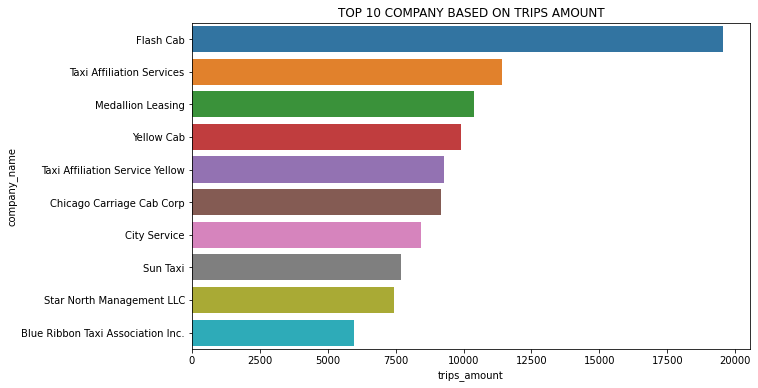

In [112]:
plt.figure(figsize=(10, 6))
plt.title('TOP 10 COMPANY BASED ON TRIPS AMOUNT')
sns.barplot(data=new_df_1, x='trips_amount', y='company_name')
plt.show()

CONCLUSION: The taxi company with the highest number of trips over 2 days was Flash Cab which had almost 20,000 trips. Then followed by Taxi Affiliate Service, with a very large difference in travel with Flash Cab. The rest of the companies have a number of trips that are not too different.

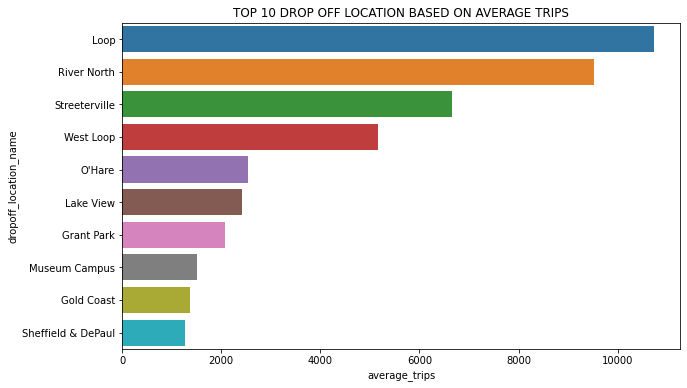

In [113]:
plt.figure(figsize=(10, 6))
plt.title('TOP 10 DROP OFF LOCATION BASED ON AVERAGE TRIPS')
sns.barplot(data=new_df_2, x='average_trips', y='dropoff_location_name')
plt.show()

CONCLUSION: The region with the highest average number of trips to drop off is Loop at over 10000 followed by River North. The difference between the averages of the two regions is not too far. Meanwhile, other regions have an average of less than 8,000.

## Hypothesis Testing

**Ho = The average trip duration from the Loop to O'Hare International Airport on a rainy Saturday is the SAME.**

**H1 = The average trip duration from the Loop to O'Hare International Airport on a rainy Saturday is NOT THE SAME.**

In [114]:
df_3 = pd.read_csv('/datasets/project_sql_result_07.csv')

In [115]:
df_3

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


We will change the data type of the 'start_ts' column to datetime.

In [116]:
df_3['start_ts'] = pd.to_datetime(df_3['start_ts'], format='%Y-%m-%d')

In [117]:
df_3['day'] = df_3['start_ts'].dt.day_name()

In [118]:
df_3

,start_ts,weather_conditions,duration_seconds,day
0,2017-11-25 16:00:00,Good,2410.0,Saturday
1,2017-11-25 14:00:00,Good,1920.0,Saturday
2,2017-11-25 12:00:00,Good,1543.0,Saturday
3,2017-11-04 10:00:00,Good,2512.0,Saturday
4,2017-11-11 07:00:00,Good,1440.0,Saturday
...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0,Saturday
1064,2017-11-11 10:00:00,Good,1318.0,Saturday
1065,2017-11-11 13:00:00,Good,2100.0,Saturday
1066,2017-11-11 08:00:00,Good,1380.0,Saturday


In [119]:
df_3['weather_conditions'].value_counts()

Good    888
Bad     180
Name: weather_conditions, dtype: int64

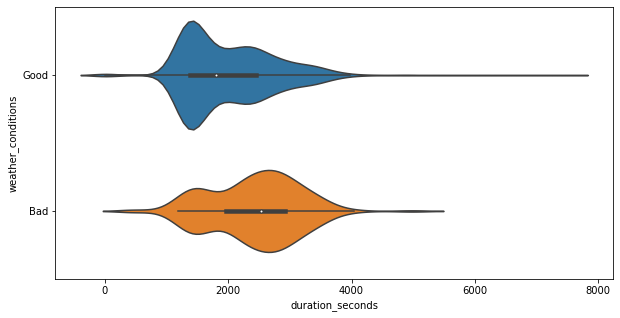

In [120]:
plt.figure(figsize=(10,5))
sns.violinplot(data=df_3, x='duration_seconds', y='weather_conditions')
plt.show()

In [121]:
df_3_bad = df_3.loc[df_3['weather_conditions']=='Bad']
df_3_bad

,start_ts,weather_conditions,duration_seconds,day
6,2017-11-04 16:00:00,Bad,2969.0,Saturday
30,2017-11-18 12:00:00,Bad,1980.0,Saturday
34,2017-11-04 17:00:00,Bad,2460.0,Saturday
51,2017-11-04 16:00:00,Bad,2760.0,Saturday
52,2017-11-18 12:00:00,Bad,2460.0,Saturday
...,...,...,...,...
1031,2017-11-18 12:00:00,Bad,2560.0,Saturday
1032,2017-11-18 10:00:00,Bad,1908.0,Saturday
1053,2017-11-18 12:00:00,Bad,2400.0,Saturday
1061,2017-11-18 16:00:00,Bad,2186.0,Saturday


In [122]:
df_3_good = df_3.loc[df_3['weather_conditions']=='Good']
df_3_good

,start_ts,weather_conditions,duration_seconds,day
0,2017-11-25 16:00:00,Good,2410.0,Saturday
1,2017-11-25 14:00:00,Good,1920.0,Saturday
2,2017-11-25 12:00:00,Good,1543.0,Saturday
3,2017-11-04 10:00:00,Good,2512.0,Saturday
4,2017-11-11 07:00:00,Good,1440.0,Saturday
...,...,...,...,...
1062,2017-11-11 06:00:00,Good,1500.0,Saturday
1063,2017-11-25 11:00:00,Good,0.0,Saturday
1064,2017-11-11 10:00:00,Good,1318.0,Saturday
1065,2017-11-11 13:00:00,Good,2100.0,Saturday


From the visualization diagram above, it can be concluded that there is an outlier so we will throw it away.

In [123]:
def df_3_clean (data, column):
    quantile_1 = data[column].quantile(0.25)
    quantile_3 = data[column].quantile(0.75)
    IQR = quantile_3 - quantile_1
    lower_bound = quantile_1 - 1.5*IQR
    upper_bound = 1.5*IQR + quantile_3
    dataframe = data.loc[(data[column] > lower_bound) & (data[column] < upper_bound)]
    return dataframe

In [124]:
df_3_good_clean = df_3_clean (data=df_3_good, column='duration_seconds')
df_3_bad_clean = df_3_clean (data=df_3_bad, column='duration_seconds')

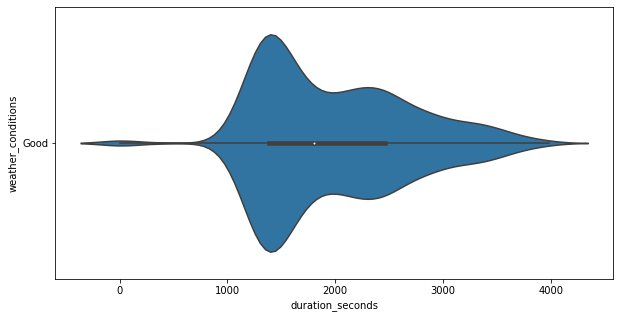

In [125]:
plt.figure(figsize=(10,5))
sns.violinplot(data=df_3_good_clean, x='duration_seconds', y='weather_conditions')
plt.show()


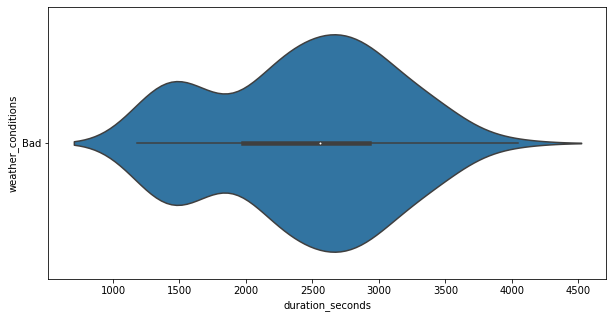

In [126]:
plt.figure(figsize=(10,5))
sns.violinplot(data=df_3_bad_clean, x='duration_seconds', y='weather_conditions')
plt.show()

From the diagram above it can be said that the distribution is not normal. To make sure, we can check whether the distribution is normal or not using Shapiro, if the pvalue is less than 5% then the distribution is not normal.

In [127]:
shapiro(df_3_good_clean['duration_seconds']).pvalue

8.395970071377549e-19

In [128]:
shapiro(df_3_bad_clean['duration_seconds']).pvalue

0.0002595653641037643

If the distribution is not normal, the Mann Whitney test is carried out.

In [129]:
pvalue = mannwhitneyu(df_3_good_clean['duration_seconds'], df_3_bad_clean['duration_seconds']).pvalue
pvalue

3.4547468378060904e-15

In [130]:
alpha = 0.05
if pvalue < alpha:
    print('Reject Ho')
else:
    print('Can not reject Ho')


Reject Ho


CONCLUSION: From the hypothesis test, the result was 'Reject Ho', which means that the average duration of the trip from the Loop to O'Hare International Airport when it rains on Saturday is NOT THE SAME or DIFFERENT.

We will check the average duration when conditions are 'Bad' / rainy and 'Good' / sunny.

In [131]:
print('Average trip duration when it rains:',df_3_bad_clean.mean()/60, 'mins')
print('Average trip duration when it rainsn:',df_3_good_clean.mean()/60, 'mins')

Average trip duration when it rains: duration_seconds    40.579755
dtype: float64 mins
Average trip duration when it rainsn: duration_seconds    32.946939
dtype: float64 mins


## CONCLUSION

We will determine the effect of weather on travel frequency. From the general information, it was found that there were no missing values ​​and the data type was correct. Then data preparation was carried out in the form of filtering the 10 companies with the highest number of trips and the 10 drop off areas with the highest average trips. Then data analysis was carried out, the results of the diagram visualization showed that Flash Cab was in first place for the highest number of trips followed by Taxi Affiliate Services. Meanwhile, the Loop area is the drop off place with the highest trip average, followed by River North. Lastly, do a hypothesis test, first look at the contents of the data first, then ensure that the travel data occurred on Saturday, then divide the data into two based on the weather, namely sunny (Good) and not sunny (Bad). Then remove any outliers and check the distribution. From the visualization results and checking with Shapiro, it shows that the data distribution is not a normal distribution because the pvalue is less than 5%, so to test the hypothesis using 'mannwhitneyu'. After testing the hypothesis, the 'Reject Ho' results were obtained which showed that the average duration of the trip from the Loop to O'Hare International Airport when it rained on Saturday was DIFFERENT.